In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn
import collections
from decimal import Decimal, ROUND_HALF_UP, ROUND_HALF_EVEN
import math
from PIL import Image
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import statistics
from sklearn.preprocessing import QuantileTransformer

In [3]:
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

In [4]:
dat1=pd.read_table('MA_OUT_IN.txt',encoding='CP932',sep='\t')

In [5]:
dat1['発表日']=pd.to_datetime(dat1['発表日'],format='%m/%d/%Y',errors='coerce')

In [6]:
dat2=dat1.loc[:,['買収側企業 12ｶ月EBITDA','ﾀｰｹﾞｯﾄ企業 12ｶ月EBITDA']]
dat2=dat2.dropna(subset=['買収側企業 12ｶ月EBITDA','ﾀｰｹﾞｯﾄ企業 12ｶ月EBITDA'])
dat3=dat2[(dat2['買収側企業 12ｶ月EBITDA']>int(0))&(dat2['ﾀｰｹﾞｯﾄ企業 12ｶ月EBITDA']>int(0))]
def L(a):
    return(math.log(a))
dat3['Log of Acquirer EBITDA']=dat3['買収側企業 12ｶ月EBITDA'].apply(L)
dat3['Log of Target EBITDA']=dat3['ﾀｰｹﾞｯﾄ企業 12ｶ月EBITDA'].apply(L)
Acquirer=dat3[['Log of Acquirer EBITDA']]
Target=dat3[['Log of Target EBITDA']]

<ipython-input-6-9f68a5289727>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dat3['Log of Acquirer EBITDA']=dat3['買収側企業 12ｶ月EBITDA'].apply(L)
<ipython-input-6-9f68a5289727>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dat3['Log of Target EBITDA']=dat3['ﾀｰｹﾞｯﾄ企業 12ｶ月EBITDA'].apply(L)


<ipython-input-20-dd70482b60cd>:10: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  ax1.plot(Target,model.predict(Target),LineStyle='solid',color='lawngreen',label='Best Fit')


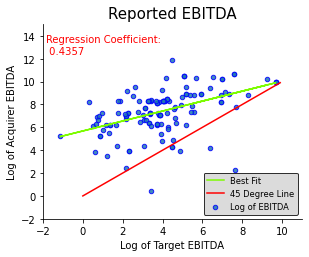

In [20]:
%matplotlib inline 
fig=plt.figure(figsize=(5.0,3.0))
fig.subplots_adjust(left=0.03, right=0.75, bottom=0.05, top=0.95, wspace=0.30, hspace=0.05)
ax1=fig.add_subplot(111)
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.scatter(dat3['Log of Target EBITDA'],dat3['Log of Acquirer EBITDA'],s=20,edgecolors='blue',alpha=0.85,label='Log of EBITDA')
model=LinearRegression()
model.fit(Target,Acquirer)
ax1.plot(Target,model.predict(Target),LineStyle='solid',color='lawngreen',label='Best Fit')
ax1.set_title('Reported EBITDA',fontsize=15.0)
ax1.set_xlabel('Log of Target EBITDA')
ax1.set_ylabel('Log of Acquirer EBITDA')
ax1.set_xlim(-2,11)
ax1.set_ylim(-2,15)
ax1.text(0.01,0.95,'Regression Coefficient:\n %.4f'%model.coef_, verticalalignment='top',transform=ax1.transAxes,color='red')
x=np.arange(0,10,0.1)
y=x
ax1.plot(x,y,color='red',label='45 Degree Line')
ax1.legend(loc='lower right',edgecolor='black',fontsize='small',facecolor='lightgray')
plt.show()


In [23]:
len(dat3[dat3['Log of Target EBITDA']<dat3['Log of Acquirer EBITDA']])

126

In [24]:
len(dat3)

132

In [16]:
x=dat3[['Log of Target EBITDA']]
Y=dat3[['Log of Acquirer EBITDA']]
X=sm.add_constant(x)
model=sm.OLS(Y,X)
results=model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     Log of Acquirer EBITDA   R-squared:                       0.222
Model:                                OLS   Adj. R-squared:                  0.216
Method:                     Least Squares   F-statistic:                     37.11
Date:                    Mon, 07 Feb 2022   Prob (F-statistic):           1.18e-08
Time:                            02:22:06   Log-Likelihood:                -256.92
No. Observations:                     132   AIC:                             517.8
Df Residuals:                         130   BIC:                             523.6
Df Model:                               1                                         
Covariance Type:                nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    5.6807      0.319     17.820      0.000       5.050       6.311
Log of Target EBITDA     0.4357      0.072      6.091      0.000       0.294       0.577
==============================================================================
Omnibus:                       37.621   Durbin-Watson:                   1.768
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               78.892
Skew:                          -1.202   Prob(JB):                     7.39e-18
Kurtosis:                       5.927   Cond. No.                         9.94
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
col=dat1.columns.tolist()
k=col[10:30]
dat1[k].count()

買収側企業 12ｶ月EBITDA       2170
買収側企業 12ｶ月営業利益率        2534
買収側企業 12ｶ月粗利益率         1726
買収側企業 過去12ｶ月売上高        2552
ﾀｰｹﾞｯﾄ企業 12ｶ月EBITDA     317
ﾀｰｹﾞｯﾄ企業 12ｶ月営業利益率      402
ﾀｰｹﾞｯﾄ企業 12ｶ月粗利益率       295
ﾀｰｹﾞｯﾄ企業 過去12ｶ月売上高      412
売却側のﾃｨｯｶｰ              3159
売却側企業 従業員総数            2626
売却側企業 産業ｸﾞﾙｰﾌﾟ         4553
買収側のﾃｨｯｶｰ              3971
買収側企業 従業員総数            2143
買収側企業 産業ｸﾞﾙｰﾌﾟ         4553
ﾀｰｹﾞｯﾄ会社のﾃｨｯｶｰ         2745
ﾀｰｹﾞｯﾄ企業 従業員総数          534
ﾀｰｹﾞｯﾄ企業 産業ｸﾞﾙｰﾌﾟ      4553
売却側企業 付加価値                4
買収側企業 付加価値              143
ﾀｰｹﾞｯﾄ企業 付加価値            14
dtype: int64

In [ ]:
dat3=dat1.loc[:,['ﾀｰｹﾞｯﾄ企業 12ｶ月営業利益率','買収側企業 12ｶ月営業利益率']]
dat3=dat3.dropna()
dat4=dat3[(dat3['ﾀｰｹﾞｯﾄ企業 12ｶ月営業利益率']>0)&(dat3['買収側企業 12ｶ月営業利益率']>0)]

In [ ]:
X=dat3['ﾀｰｹﾞｯﾄ企業 12ｶ月営業利益率'].values.reshape(-1,1)
dat3['Scaled Target PR']=QuantileTransformer(output_distribution='normal').fit_transform(X)
Y=dat3['買収側企業 12ｶ月営業利益率'].values.reshape(-1,1)
dat3['Scaled Acquirer PR']=QuantileTransformer(output_distribution='normal').fit_transform(Y)
X=dat4['ﾀｰｹﾞｯﾄ企業 12ｶ月営業利益率'].values.reshape(-1,1)
dat4['Scaled Target PR']=QuantileTransformer(output_distribution='normal').fit_transform(X)
Y=dat4['買収側企業 12ｶ月営業利益率'].values.reshape(-1,1)
dat4['Scaled Acquirer PR']=QuantileTransformer(output_distribution='normal').fit_transform(Y)

C:\Users\IchiroKozakai\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2612: UserWarning: n_quantiles (1000) is greater than the total number of samples (214). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "
C:\Users\IchiroKozakai\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2612: UserWarning: n_quantiles (1000) is greater than the total number of samples (214). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "
C:\Users\IchiroKozakai\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2612: UserWarning: n_quantiles (1000) is greater than the total number of samples (142). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "
<ipython-input-10-417edf07fd47>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instea

<ipython-input-11-2940e0807cb1>:9: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  ax1.plot(dat3[['Scaled Target PR']],model.predict(dat3[['Scaled Target PR']]),LineStyle='solid',color='lawngreen',label='Best Fit')
<ipython-input-11-2940e0807cb1>:22: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  ax2.plot(dat4[['Scaled Target PR']],model.predict(dat4[['Scaled Target PR']]),LineStyle='solid',color='lawngreen',label='Best Fit')


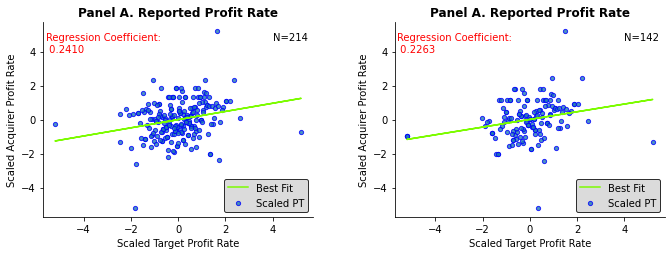

In [ ]:
%matplotlib inline 
fig=plt.figure(figsize=(12.0,3.0))
fig.subplots_adjust(left=0.03, right=0.75, bottom=0.05, top=0.95, wspace=0.30, hspace=0.05)
ax1=fig.add_subplot(121)
ax2=fig.add_subplot(122)
ax1.scatter(dat3['Scaled Target PR'],dat3['Scaled Acquirer PR'],s=18,edgecolors='blue',alpha=0.8,label='Scaled PT')
model=LinearRegression()
model.fit(dat3[['Scaled Target PR']],dat3[['Scaled Acquirer PR']])
ax1.plot(dat3[['Scaled Target PR']],model.predict(dat3[['Scaled Target PR']]),LineStyle='solid',color='lawngreen',label='Best Fit')
ax1.text(0.01,0.95,'Regression Coefficient:\n %.4f'%model.coef_, verticalalignment='top',transform=ax1.transAxes,color='red')
ax1.text(0.85,0.95,'N=%d'%len(dat3), verticalalignment='top',transform=ax1.transAxes,color='black')
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.set_xlabel('Scaled Target Profit Rate')
ax1.set_ylabel('Scaled Acquirer Profit Rate')
ax1.set_title('Panel A. Reported Profit Rate',fontweight=1000)
ax1.legend(loc='lower right',edgecolor='black',facecolor='lightgray')

ax2.scatter(dat4['Scaled Target PR'],dat4['Scaled Acquirer PR'],s=18,edgecolors='blue',alpha=0.8,label='Scaled PT')
model=LinearRegression()
model.fit(dat4[['Scaled Target PR']],dat4[['Scaled Acquirer PR']])
ax2.plot(dat4[['Scaled Target PR']],model.predict(dat4[['Scaled Target PR']]),LineStyle='solid',color='lawngreen',label='Best Fit')
ax2.text(0.01,0.95,'Regression Coefficient:\n %.4f'%model.coef_, verticalalignment='top',transform=ax2.transAxes,color='red')
ax2.text(0.85,0.95,'N=%d'%len(dat4), verticalalignment='top',transform=ax2.transAxes,color='black')
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.set_xlabel('Scaled Target Profit Rate')
ax2.set_ylabel('Scaled Acquirer Profit Rate')
ax2.set_title('Panel A. Reported Profit Rate',fontweight=1000)
ax2.legend(loc='lower right',edgecolor='black',facecolor='lightgray')
plt.show()


In [ ]:
x=dat3[['Scaled Target PR']]
Y=dat3[['Scaled Acquirer PR']]
X=sm.add_constant(x)
model=sm.OLS(Y,X)
results=model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     Scaled Acquirer PR   R-squared:                       0.058
Model:                            OLS   Adj. R-squared:                  0.054
Method:                 Least Squares   F-statistic:                     13.13
Date:                Sat, 05 Feb 2022   Prob (F-statistic):           0.000365
Time:                        02:59:32   Log-Likelihood:                -316.28
No. Observations:                 214   AIC:                             636.6
Df Residuals:                     212   BIC:                             643.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.0018      0.073     -0.024      0.981      -0.145       0.142
Scaled Target PR     0.2410      0.067      3.623      0.000       0.110       0.372
==============================================================================
Omnibus:                       18.867   Durbin-Watson:                   2.028
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               68.776
Skew:                          -0.057   Prob(JB):                     1.16e-15
Kurtosis:                       5.775   Cond. No.                         1.10
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
x=dat4[['Scaled Target PR']]
Y=dat4[['Scaled Acquirer PR']]
X=sm.add_constant(x)
model=sm.OLS(Y,X)
results=model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     Scaled Acquirer PR   R-squared:                       0.063
Model:                            OLS   Adj. R-squared:                  0.056
Method:                 Least Squares   F-statistic:                     9.440
Date:                Sat, 05 Feb 2022   Prob (F-statistic):            0.00255
Time:                        02:59:32   Log-Likelihood:                -215.79
No. Observations:                 142   AIC:                             435.6
Df Residuals:                     140   BIC:                             441.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.0102      0.094      0.109      0.914      -0.175       0.195
Scaled Target PR     0.2263      0.074      3.072      0.003       0.081       0.372
==============================================================================
Omnibus:                       24.163   Durbin-Watson:                   1.911
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              138.332
Skew:                          -0.239   Prob(JB):                     9.15e-31
Kurtosis:                       7.812   Cond. No.                         1.27
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""